<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/Lab_7_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

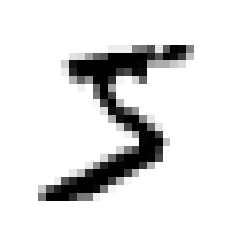

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image,cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train.astype('float')>=7

0        False
1        False
2        False
3        False
4         True
         ...  
59995     True
59996    False
59997    False
59998    False
59999     True
Name: class, Length: 60000, dtype: bool

In [ ]:
y_train_large=(y_train.astype('float')>=7)
y_train_odd=(y_train.astype('float')%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
y_multilabel.dtype

dtype('bool')

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred , average="weighted")

0.9778357403921755

In [ ]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

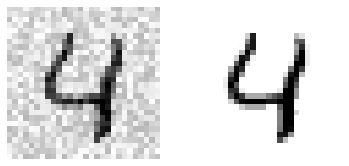

In [ ]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
    plt.axis("off")
some_index = 4
plt.subplot(121);plot_digit(X_test_mod.iloc[some_index].values)
plt.subplot(122);plot_digit(y_test_mod.iloc[some_index].values)
plt.show()

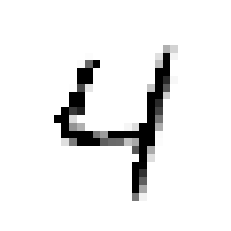

In [ ]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit =knn_clf.predict([X_test_mod.iloc[some_index]])
plot_digit(clean_digit)
plt.show()

## QUESTION 2

In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
def isprime(num):
    if num <=1:
        return False
    flag = True

    # prime numbers are greater than 1
    if num >(1):
    # check for factors
        for i in range(2, num):
            if (num % i) == 0:
                # if factor is found, set flag to True
                flag = False
                break
        return flag
    

In [ ]:
#print(isprime(3))
y_train.astype('int').apply(isprime)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996     True
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [ ]:
y_train_large=(y_train.astype('float')<5)
y_train_odd=(y_train.astype('float')%2 == 0)
y_train_isprime=(y_train.astype('int').apply(isprime))
y_multilabel = np.c_[y_train_large,y_train_odd,y_train_isprime]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
y_test_large=(y_test.astype('float')<5)
y_test_odd=(y_test.astype('float')%2 == 0)
y_test_isprime=(y_test.astype('int').apply(isprime))
y_multilabel_test = np.c_[y_test_large,y_test_odd,y_test_isprime]

In [ ]:
y_pred=knn_clf.predict(X_test)

In [ ]:
y_multilabel.shape

(60000, 3)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_test, y_multilabel_test, cv=3)
print("F1 SCORE: ",f1_score(y_multilabel_test, y_train_knn_pred , average="macro"))

F1 SCORE:  0.963325918514963


In [ ]:
from sklearn.metrics import accuracy_score
print("ACCURACY: ",accuracy_score(y_multilabel_test, y_pred))

ACCURACY:  0.9697


## QUESTION 3

In [ ]:
from skimage.util import random_noise
def addnoise(value):
    return (random_noise(value,mode='gaussian'))
noise_img =X_train.apply(addnoise)

In [ ]:
noise_image_test=X_test.apply(addnoise)

In [ ]:
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
y_train_mod.shape

(60000, 784)

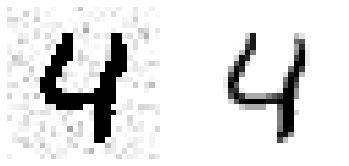

In [ ]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
    plt.axis("off")
some_index = 4
plt.subplot(121);plot_digit(noise_image_test.iloc[some_index].values)
plt.subplot(122);plot_digit(y_test_mod.iloc[some_index].values)
plt.show()

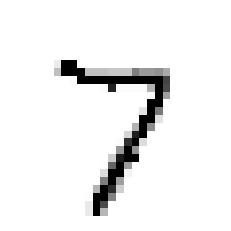

In [ ]:
knn_clf.fit(noise_img,y_train_mod)
clean_digit =knn_clf.predict(noise_image_test)
plot_digit(clean_digit[0])
plt.show()

## QUESTION 4

In [ ]:
letter = fetch_openml('letter',version=1)
letter.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = letter["data"],letter["target"]
print(X.shape)
print(y.shape)

(20000, 16)
(20000,)


In [ ]:
X.iloc[0]

x-box     2.0
y-box     4.0
width     4.0
high      3.0
onpix     2.0
x-bar     7.0
y-bar     8.0
x2bar     2.0
y2bar     9.0
xybar    11.0
x2ybr     7.0
xy2br     7.0
x-ege     1.0
xegvy     8.0
y-ege     5.0
yegvx     6.0
Name: 0, dtype: float64

In [ ]:
y.iloc[0]

'Z'

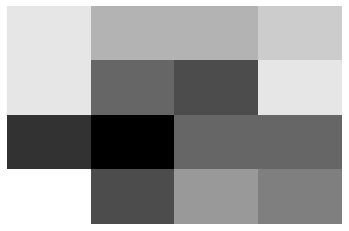

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_letter = X.iloc[0]
some_letter_image = some_letter.values.reshape(4,4)
plt.imshow(some_letter_image,cmap = mpl.cm.binary, interpolation="nearest", aspect= 'auto')
plt.axis("off")
plt.show()

In [ ]:
y.unique()

['Z', 'P', 'S', 'H', 'F', ..., 'T', 'C', 'G', 'B', 'J']
Length: 26
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']

In [ ]:
def smallAH(value):
    if (value>='A') and (value<='H'):
        return True
    else:
        return False
def isvowel(value):
    vowel=["A","E","I","O","U"]
    if value in vowel:
        return True
    else:
        return False

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [ ]:
y_train_AH=y_train.apply(smallAH)
y_test_AH=y_test.apply(smallAH)
y_train_vowel=y_train.apply(isvowel)
y_test_vowel=y_test.apply(isvowel)
y_multilabel = np.c_[y_train_AH,y_train_vowel]
y_multilabel_test = np.c_[y_test_AH,y_test_vowel]

In [ ]:
y_train

5894     H
3728     V
8958     D
7671     H
5999     F
        ..
11284    W
11964    R
5390     X
860      I
15795    I
Name: class, Length: 16000, dtype: category
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']

In [ ]:
y_train_AH

5894      True
3728     False
8958      True
7671      True
5999      True
         ...  
11284    False
11964    False
5390     False
860      False
15795    False
Name: class, Length: 16000, dtype: object

In [ ]:
y_multilabel=y_multilabel.astype('bool')
y_multilabel_test =y_multilabel_test.astype('bool')

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_letter])

array([[False, False]])

In [ ]:
y_pred=knn_clf.predict(X_test)

In [ ]:
y_pred

array([[False, False],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

In [ ]:
from sklearn.metrics import f1_score
print("F1 SCORE: ",f1_score(y_multilabel_test, y_pred, average='weighted', zero_division=True))

F1 SCORE:  0.9602820202257784


In [ ]:
from sklearn.metrics import accuracy_score
print("ACCURACY: ",accuracy_score(y_multilabel_test, y_pred))

ACCURACY:  0.966
